# We default to OpenAI models in this guide.

In [2]:
import getpass
import os

#os.environ["OPENAI_API_KEY"] = getpass.getpass()
os.environ["OPENAI_API_KEY"] = 'sk-proj-BKS78AVIi2yCCmGDQmybT3BlbkFJAQk6CG5ZiR6oxgw1KDqI'

# Uncomment the below to use LangSmith. Not required.
# os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()
# os.environ["LANGCHAIN_TRACING_V2"] = "true"

# Next, we need to define Neo4j credentials and connection. Follow these installation steps to set up a Neo4j database.


In [8]:
import os

from langchain_community.graphs import Neo4jGraph

os.environ["NEO4J_URI"] = "bolt://localhost:7687"
os.environ["NEO4J_USERNAME"] = "neo4j"
os.environ["NEO4J_PASSWORD"] = "12345678"

graph = Neo4jGraph()

# LLM Graph Transformer

In [10]:
import os

from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

llm_transformer = LLMGraphTransformer(llm=llm)

In [11]:
from langchain_core.documents import Document

text = """
Marie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
She was, in 1906, the first woman to become a professor at the University of Paris.
"""
documents = [Document(page_content=text)]
graph_documents = llm_transformer.convert_to_graph_documents(documents)
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

Nodes:[Node(id='Marie Curie', type='Person'), Node(id='Pierre Curie', type='Person'), Node(id='Nobel Prize', type='Award'), Node(id='University Of Paris', type='Organization')]
Relationships:[Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='1867', type='Date'), type='BORN'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Polish', type='Nationality'), type='HAS_NATIONALITY'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='French', type='Nationality'), type='HAS_NATIONALITY'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Radioactivity', type='Field'), type='RESEARCHED'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Nobel Prize', type='Award'), type='WON'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Nobel Prize', type='Award'), type='WON'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Pie

In [12]:
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Country", "Organization"],
    allowed_relationships=["NATIONALITY", "LOCATED_IN", "WORKED_AT", "SPOUSE"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(
    documents
)
print(f"Nodes:{graph_documents_filtered[0].nodes}")
print(f"Relationships:{graph_documents_filtered[0].relationships}")

Nodes:[Node(id='Marie Curie', type='Person'), Node(id='Poland', type='Country'), Node(id='France', type='Country'), Node(id='Pierre Curie', type='Person'), Node(id='University Of Paris', type='Organization')]
Relationships:[Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Poland', type='Country'), type='NATIONALITY'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='France', type='Country'), type='NATIONALITY'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Pierre Curie', type='Person'), type='SPOUSE'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='University Of Paris', type='Organization'), type='WORKED_AT')]


In [13]:
llm_transformer_props = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Country", "Organization"],
    allowed_relationships=["NATIONALITY", "LOCATED_IN", "WORKED_AT", "SPOUSE"],
    node_properties=["born_year"],
)
graph_documents_props = llm_transformer_props.convert_to_graph_documents(documents)
print(f"Nodes:{graph_documents_props[0].nodes}")
print(f"Relationships:{graph_documents_props[0].relationships}")

Nodes:[Node(id='Marie Curie', type='Person', properties={'born_year': '1867'}), Node(id='Poland', type='Country'), Node(id='France', type='Country'), Node(id='Pierre Curie', type='Person'), Node(id='University Of Paris', type='Organization')]
Relationships:[Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Poland', type='Country'), type='NATIONALITY'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='France', type='Country'), type='NATIONALITY'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='Pierre Curie', type='Person'), type='SPOUSE'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='University Of Paris', type='Organization'), type='WORKED_AT')]


In [14]:
text = """
A : 根據提供的文字描述，台灣廠商在當前市場環境下有以下幾點值得關注：
1. **灰達狀況**：
   - 灰達（NVIDIA）目前處於震盪狀態，雖然受到法國指控壟斷的消息影響，但最終收紅，顯示市場對其長期前景仍持樂觀態度。
2. **台積電情況**：
   - 台積電的供應鏈最近表現強勁，並且有瑞銀調高其資本支出預估的消息，顯示出市場對其未來增長的信心。
   - 台積電在雲林設立先進封裝廠，意味著其在技術和產能上的進一步提升，這可能為相關供應鏈企業帶來更多機會。
3. **電子股動能**：
   - 台股的電子股似乎在等待一個新的動能，這可能與全球市場的變動或新技術的突破相關。
4. **投資建議**：
   - 蔡經理提到會分享如何把握灰達和台灣AI股的節奏，並挑選一些價值被低估的好股票。投資者可以關注這些被低估的股票，特別是在AI和半導體領域，這些領域有望在未來獲得顯著增長。
總體而言，台灣廠商在技術創新和市場需求的驅動下，仍有較大的發展潛力。投資者應該密切關注相關消息和市場動態，抓住投資機會。
"""
documents = [Document(page_content=text)]
graph_documents = llm_transformer.convert_to_graph_documents(documents)
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

Nodes:[Node(id='Nvidia', type='Organization'), Node(id='France', type='Country'), Node(id='Tsmc', type='Organization'), Node(id='Ubs', type='Organization'), Node(id='Yunlin', type='Location'), Node(id='Manager Cai', type='Person'), Node(id='Taiwan', type='Country'), Node(id='Ai', type='Technology'), Node(id='Semiconductor', type='Technology')]
Relationships:[Relationship(source=Node(id='France', type='Country'), target=Node(id='Nvidia', type='Organization'), type='ACCUSED'), Relationship(source=Node(id='Ubs', type='Organization'), target=Node(id='Tsmc', type='Organization'), type='INCREASED_CAPITAL_EXPENDITURE_ESTIMATE'), Relationship(source=Node(id='Tsmc', type='Organization'), target=Node(id='Yunlin', type='Location'), type='ESTABLISHED_ADVANCED_PACKAGING_PLANT'), Relationship(source=Node(id='Manager Cai', type='Person'), target=Node(id='Nvidia', type='Organization'), type='INVESTMENT_ADVICE'), Relationship(source=Node(id='Manager Cai', type='Person'), target=Node(id='Ai', type='Tech

In [2]:
import pandas as pd

# Define the heads, relations, and tails
head = ['France', 'Ubs', 'Tsmc', 'Manager Cai', 'Manager Cai', 'Semiconduct', 'Nvidia', 'Tsmc']
relation = ['ACCUSED', 'INCREASED_CAPITAL_EXPENDITURE_ESTIMATE', 'ESTABLISHED_ADVANCED_PACKAGING_PLANT', 'INVESTMENT_ADVICE', 'INVESTMENT_ADVICE', 'INVESTMENT_ADVICE', 'MARKET_INTEREST', 'MARKET_INTEREST']
tail = ['Nvidia', 'Tsmc', 'Yunlin', 'Nvidia', 'AI', 'Manager Cai', 'Taiwan', 'Taiwan']

# Create a dataframe
df = pd.DataFrame({'head': head, 'relation': relation, 'tail': tail})
df

,head,relation,tail
0,France,ACCUSED,Nvidia
1,Ubs,INCREASED_CAPITAL_EXPENDITURE_ESTIMATE,Tsmc
2,Tsmc,ESTABLISHED_ADVANCED_PACKAGING_PLANT,Yunlin
3,Manager Cai,INVESTMENT_ADVICE,Nvidia
4,Manager Cai,INVESTMENT_ADVICE,AI
5,Semiconduct,INVESTMENT_ADVICE,Manager Cai
6,Nvidia,MARKET_INTEREST,Taiwan
7,Tsmc,MARKET_INTEREST,Taiwan


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a knowledge graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['head'], row['tail'], label=row['relation'])

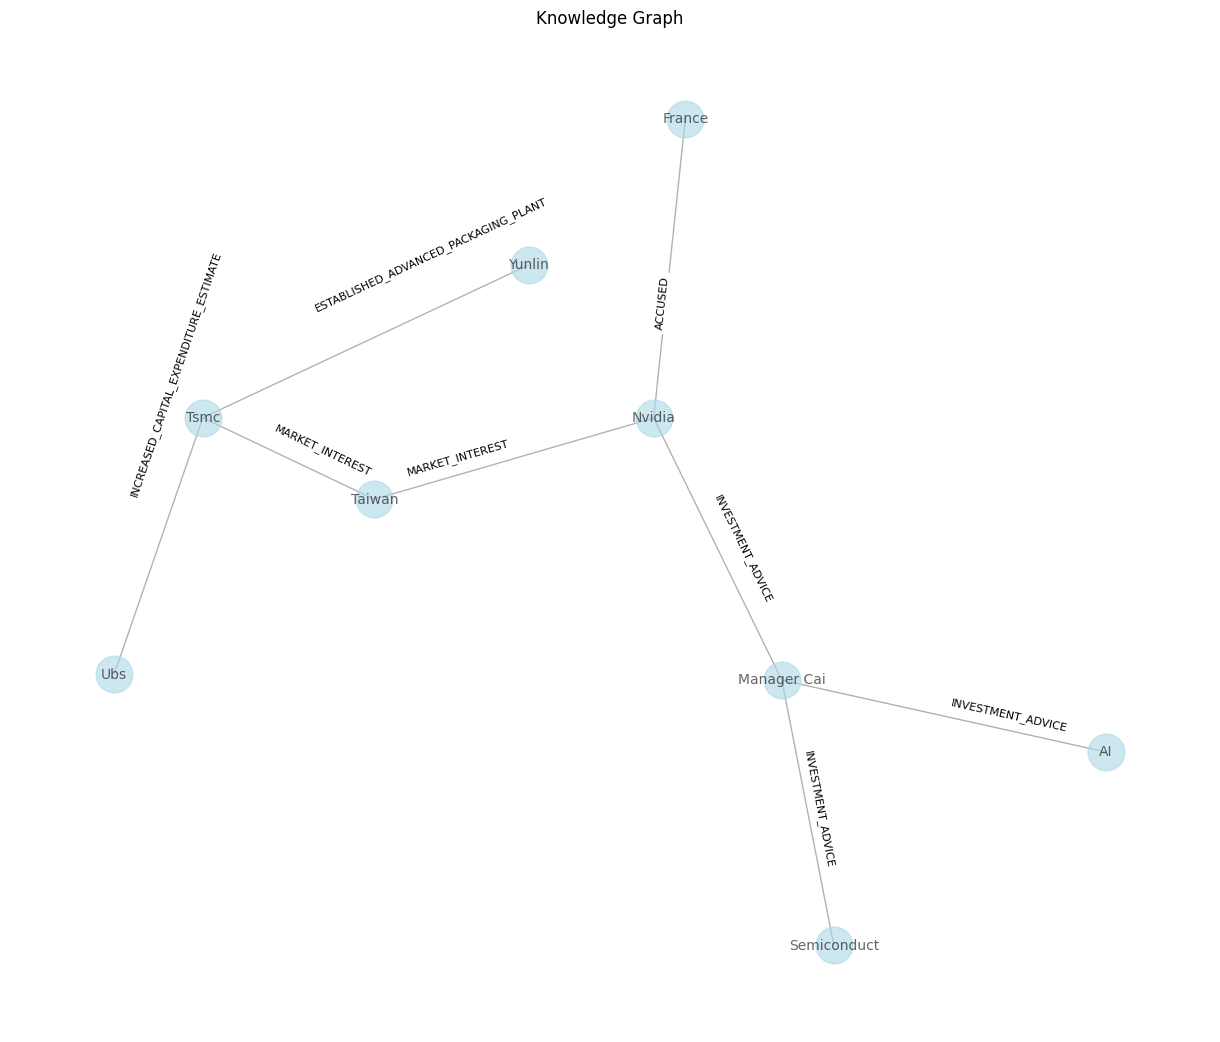

In [4]:
# Visualize the knowledge graph
pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()